In [1]:
# packages
import sys
import numpy as np
import pandas as pd
import os

import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", pd.errors.SettingWithCopyWarning)

In [2]:
user='asr599' # Username on GADI - if you are storing on /scratch/nf33/user
start_year=1980
end_year=1989
CASE_NAME='TCs_'+str(start_year)+'-'+str(end_year)   # change this if needed to match where your run files sit
base_dir=f"/scratch/nf33/{user}/hk25-AusCyclones"
case_dir=f"{base_dir}/{CASE_NAME}/"
out_dir=f"{case_dir}/stitchNodes"
out_file=f"{out_dir}/stitchNodes.csv"

In [3]:
# directory for TempestExtremes
os.environ['TEMPESTEXTREMESDIR']='/scratch/nf33/tempestextremes/bin'
# link to self-written packages
sys.path.append(base_dir) # change to your directory
from utils.plotting import plot_track, calcu_track_den, lon180to360, plot_den

In [5]:
# tropical cyclone
column_names = ["track_id", "year", "month", "day", "hour", "i", "j", "lon", "lat", "msl", "wind", "zs"]
dftc = pd.read_csv(out_file, names=column_names, skiprows=[0],low_memory=False)
dftc['time'] = pd.to_datetime(dftc[['year', 'month', 'day', 'hour']])

**Visualization 1**  
`plot_track`(df, track_color, fig_title)  
plot tracks  

Parameters:
- **df** - cyclone tracks dataframe (pandas dataframe)
- **track_color** - track color (string)
- **fig_title** - figure title (string)

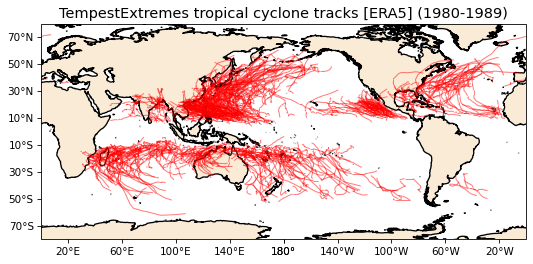

In [8]:
fig = plot_track(dftc, 'red', f'TempestExtremes tropical cyclone tracks [ERA5] ({start_year}-{end_year})')

**Visualization 2**  
`calcu_track_den`(min_lon, max_lon, min_lat, min_lat, max_lat, delta, df_track, storm_id_field, grid_id_field, lonname, latname)  
calculate track density from cyclone tracks  

Parameters:
- **min_lon** - minimum longitude
- **max_lon** - maximum longitude
- **min_lat** - minimum latitude
- **max_lat** - maximum latitude
- **delta** - horizontal grid spacing
- **df_track** - cyclone tracks dataframe (pandas dataframe)
- **storm_id_field** - cyclone track ID number (string)
- **grid_id_field** - "grid_id_field" default
- **lonname** - name of longitude of cyclone track (string)
- **latname** - name of latitude of cyclone track (string)

In [9]:
dftc['lon'] = [lon180to360(lon) for lon in dftc['lon']]
dstc = calcu_track_den(0, 360, -80, 80, 1, dftc, 'track_id', 'gridid', 'lon', 'lat')

**Visualization 3**  
`plot_den`(dataArray, minlon, maxlon, minlat, maxlat, count_range, sigma, mycmap, title)  
plot track density

Parameters:
- **dataArray** - 2-D density array (xrarry data array)
- **min_lon** - minimum longitude
- **max_lon** - maximum longitude
- **min_lat** - minimum latitude
- **max_lat** - maximum latitude
- **count_range** - colorbar levels (numpy array)
- **sigma** - degree of smooth (1~5)
- **mycmap** - name of longitude of cyclone track (string)
- **title** - figure title (string)

In [11]:
n_decades = (end_year - start_year + 1) / 10
n_decades

1.0

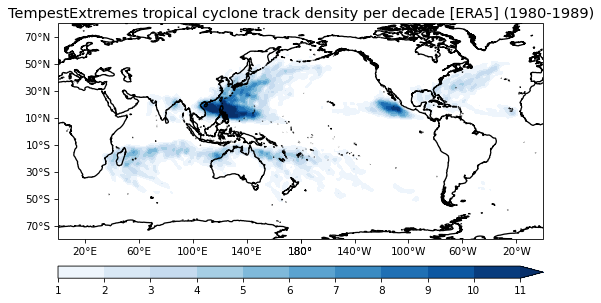

In [17]:
fig = plot_den(dstc['number']/n_decades, 0, 360, -80, 80, np.arange(1, 12, 1), 1, 'Blues', f'TempestExtremes tropical cyclone track density per decade [ERA5] ({start_year}-{end_year})')